# Decision Trees
<p><b>Decision Trees are versatile Machine Learning algorithms that can perform
both classification and regression tasks, and even multioutput tasks. They are
    powerful algorithms, capable of fitting complex datasets.</b></p>

In [109]:
import numpy as np
import pandas as pd
import matplotlib as mplg
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import warnings
warnings.filterwarnings('ignore')

In [110]:
import os

In [111]:
# # Where to save the figures
# PROJECT_ROOT_DIR = "."
# # CHAPTER_ID = "decision_trees"
# IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
# os.makedirs(IMAGES_PATH, exist_ok=True)

In [112]:
# # Save Figures
# def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
#     path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
# #     print("Saving figure", fig_id)
#     if tight_layout:
#         plt.tight_layout()
#     plt.savefig(path, format=fig_extension, dpi=resolution)

<b>Let’s build one model and take a look at how Decision Tree makes predictions.</eb>

# Classification

In [113]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [114]:
iris = load_iris()

In [115]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [116]:
X = iris.data[:,2:]
y = iris.target

In [117]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [118]:
from sklearn import tree

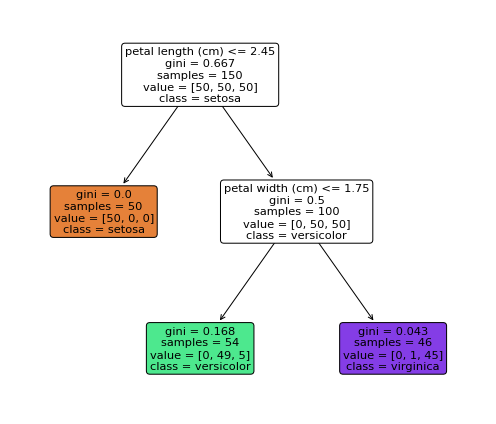

In [119]:
fig = plt.figure(figsize=(7,6))
features = iris.feature_names[2:]
tree.plot_tree(tree_clf, filled=True, feature_names=features, rounded=True, class_names=iris.target_names)
plt.tight_layout()
plt.show()

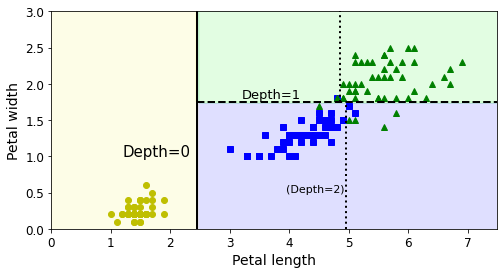

In [120]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.20, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(3.95, 0.5, "(Depth=2)", fontsize=11)
plt.show()

<p><b>A Decision Tree can also estimate the probability that an instance belongs to a particular
class k. First it traverses the tree to find the leaf node for this instance, and then it
    returns the ratio of training instances of class k in this node.</b></p>

In [121]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [122]:
tree_clf.predict([[5,1.75]])

array([1])

# Regression

In [123]:
from sklearn.tree import DecisionTreeRegressor

In [124]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [125]:
tree_reg = DecisionTreeRegressor(max_depth=2)

In [126]:
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

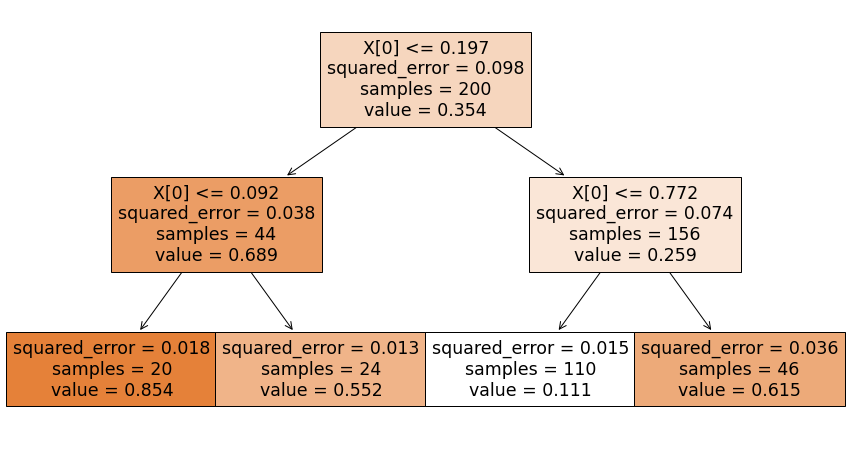

In [127]:
fig = plt.figure(figsize=(15,8))
tree.plot_tree(tree_reg, filled=True,)
plt.show()

<p><b>Above tree looks very similar to the classification tree built earlier. The main difference
is that instead of predicting a class in each node, it predicts a value. For example,
suppose if we want to make a prediction for a new instance with x1 = 0.6. Traverse
the tree starting at the root, and  eventually reach the leaf node that predicts
    value=0.111. </b></p>

In [128]:
tree_reg_3 = DecisionTreeRegressor(max_depth=3)

In [129]:
tree_reg_3.fit(X, y)

DecisionTreeRegressor(max_depth=3)

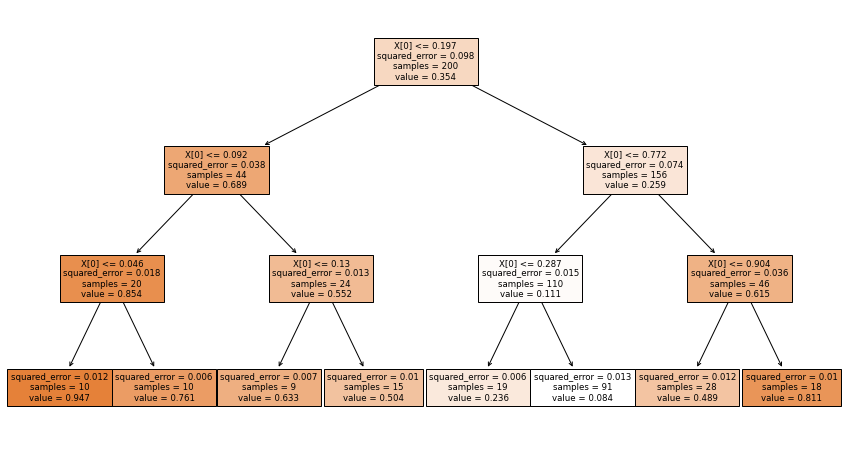

In [130]:
fig = plt.figure(figsize=(15,8))
tree.plot_tree(tree_reg_3, filled=True,)
plt.show()

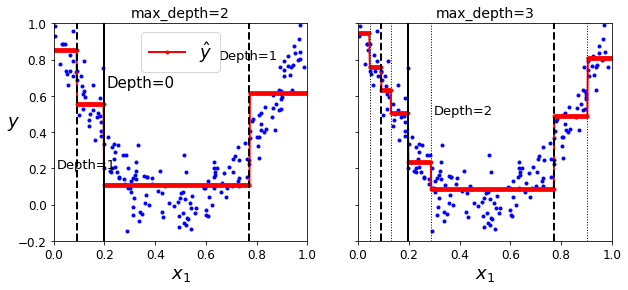

In [131]:
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")
#     print(y_pred)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

# save_fig("tree_regression_plot")
plt.show()

<p><b>The predicted value for each region is always the average target value of the instances in that
region. The algorithm splits each region in a way that makes most training instances
    as close as possible to that predicted value.</b></p>

## Practice Questions

<p><b>Train and fine-tune a Decision Tree for the moons dataset by following these
steps:
    <ol>
        <li>Use make_moons(n_samples=10000, noise=0.4) to generate a moons dataset.</li>
        <li>Use train_test_split() to split the dataset into a training set and a test set.</li>
<li>Use grid search with cross-validation (with the help of the GridSearchCV
class) to find good hyperparameter values for a DecisionTreeClassifier.
    Hint: try various values for max_leaf_nodes.</li>
<li>Train it on the full training set using these hyperparameters, and measure
your model’s performance on the test set. You should get roughly 85% to 87%
    accuracy.</li></ol></b></p>

In [132]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [133]:
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [134]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [135]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [136]:
kf = KFold(n_splits=5, shuffle=True, random_state=21)

In [137]:
max_leaf_node = np.arange(1,11,1)

In [138]:
params = {'max_leaf_nodes': np.arange(1,101)}

In [139]:
tree_clf_ = DecisionTreeClassifier()

In [140]:
grid_search_cv = GridSearchCV(tree_clf_, param_grid=params, verbose=1, cv=kf)

In [141]:
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=21, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])},
             verbose=1)

In [142]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=22)

<p><b>By default, GridSearchCV trains the best model found on the whole training set (setting can be changed by refit=False), so we don't need to do it again. Simply evaluate the model's accuracy:</b></p>

In [143]:
from sklearn.metrics import accuracy_score

In [145]:
y_pred = tree_clf_full.predict(X_test)
print(f'Accuracy Score is: {accuracy_score(y_test, y_pred)}')

Accuracy Score is: 0.855


<p><b>Grow a forest by following these steps:
    <ol>
<li>Continuing the previous exercise, generate 1,000 subsets of the training set,
each containing 100 instances selected randomly. Hint: you can use Scikit-
    Learn’s ShuffleSplit class for this.</li>
<li>Train one Decision Tree on each subset, using the best hyperparameter values
found in the previous exercise. Evaluate these 1,000 Decision Trees on the test
set. Since they were trained on smaller sets, these Decision Trees will likely
perform worse than the first Decision Tree, achieving only about 80%
    accuracy.</li>
<li>Now comes the magic. For each test set instance, generate the predictions of
the 1,000 Decision Trees, and keep only the most frequent prediction (you can
use SciPy’s mode() function for this). This approach gives you majority-vote
    predictions over the test set.</li>
<li>Evaluate these predictions on the test set: you should obtain a slightly higher
accuracy than your first model (about 0.5 to 1.5% higher). Congratulations,
    you have trained a Random Forest classifier!</li></ol></b></p>

In [177]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []
y=0
rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
#     y += 1
#     print(len(mini_train_index))
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [179]:
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]
# print(forest)
accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.7942140000000001

In [164]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [165]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

In [166]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.866